In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
filename = "https://raw.githubusercontent.com/ENVS110a-SP23/group8-project/main/BKB_WaterQualityData_2020084%20(1).csv"
df = pd.read_csv(filename)
sns.set_theme()
df.describe()
# do this two lines of code below actually drop the values, or do I need to remove them still?
#it seems to work. the code removed all the lines of code that included 'not recorded and null values
#i printed the df.describe values before and after the df.loc line and you are able to see how they
#are different.
df.loc[df.isnull().any(axis=1),:].reset_index(drop=True)
df.loc[df.isin(['Not Recorded']).any(axis=1),:].reset_index(drop=True)
df.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


(0.3030473415686472, 3.200957705080505e-32)


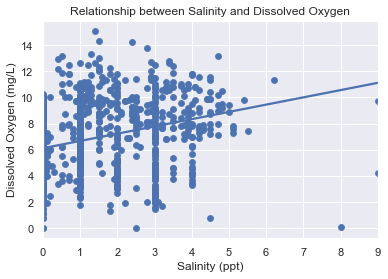

In [8]:
df_sub = df.loc[(df['Salinity (ppt)'].notnull()) & (df['Dissolved Oxygen (mg/L)'].notnull()),:].reset_index(drop=True)
ax = sns.scatterplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df_sub)
#added a regression line
sns.regplot(x = "Salinity (ppt)", y = "Dissolved Oxygen (mg/L)", ci = None, data = df_sub)
ax.set_title('Relationship between Salinity and Dissolved Oxygen') # add title
# can't figure out how to save the figure correctly to the git path online
plt.savefig('Salinity_vs_Dissolved_Oxygen_Scatterplot.png')
print(stats.pearsonr(df_sub['Salinity (ppt)'], df_sub['Dissolved Oxygen (mg/L)']))


Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):
                         Salinity (ppt)  Dissolved Oxygen (mg/L)  \
Salinity (ppt)                 1.000000                 0.303047   
Dissolved Oxygen (mg/L)        0.303047                 1.000000   
pH (standard units)            0.305178                 0.056197   
Secchi Depth (m)              -0.158061                -0.052864   
Water Depth (m)               -0.075305                -0.006511   
Water Temp (?C)                0.006429                -0.525993   
Air Temp-Celsius               0.087555                -0.333206   
Air Temp (?F)                  0.095180                -0.456090   
AirTemp (C)                    0.071170                -0.311399   
Year                          -0.622196                -0.361268   

                         pH (standard units)  Secchi Depth (m)  \
Salinity (ppt)                      0.305178         -0.158061   
Dissolved Oxygen (mg/L)             0.056197         -0

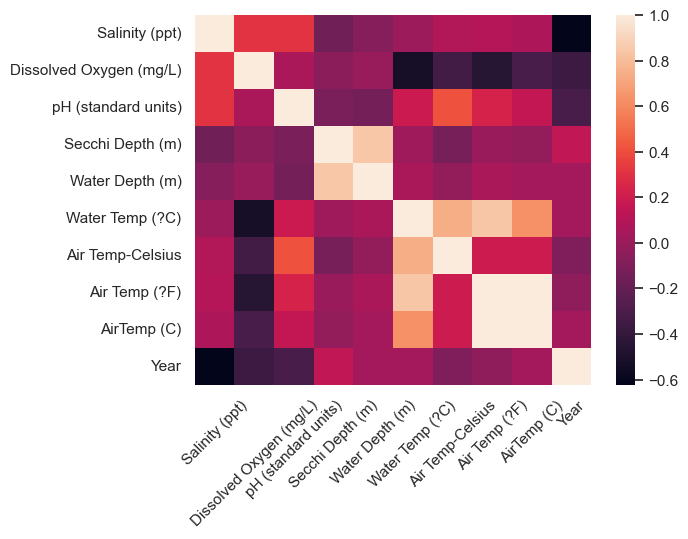

In [22]:
print('Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):')
correlations = df_sub.corr()
# not sure why this isn't printing nicely in a table
print(correlations)
sns.heatmap(correlations)
plt.xticks(rotation=45)
plt.savefig('Correlation_Matrix.png')